**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==

Professores: 


Monitora: 

Alunas: 

**Amazon Fine Food Reviews**

Analyze ~500,000 food reviews from Amazon.

## Based on **CRISP-DM**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- 1. Business understanding – What does the business need?
- 2. Data understanding – What data do we have / need? Is it clean?
- 3. Data preparation – How do we organize the data for modeling?
- 4. Modeling – What modeling techniques should we apply?
- 5. Evaluation – Which model best meets the business objectives?
- 6. Deployment – How do stakeholders access the results?

In [1379]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import time
start_time = time.time()

In [1380]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1381]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [1382]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-20 14:24:05.613857


### 1. Business understanding – What does the business need?

Compreender o contexto de negócios para a análise de sentimentos em avaliações de alimentos da Amazon é fundamental para identificar como essa análise pode ser aplicada de maneira relevante. Para a compreensão do negócio para a análise de sentimentos nessas avaliações:

1. **Descrição do problema**:
   A Amazon é uma das maiores varejistas online do mundo e possui uma vasta variedade de produtos disponíveis, incluindo alimentos. Os clientes têm a oportunidade de deixar avaliações e comentários sobre esses produtos, o que pode influenciar as decisões de compra de outros consumidores.

   A análise de sentimentos em avaliações de alimentos da Amazon visa extrair informações valiosas dessas avaliações, identificando a polaridade (positiva, negativa ou neutra) dos sentimentos expressos pelos clientes. Isso permite que a Amazon entenda melhor a satisfação do cliente em relação a um determinado produto e tome medidas adequadas para melhorar a experiência do cliente e a qualidade dos produtos oferecidos.

2. **Objetivos do negócio**:
   - Compreender a satisfação do cliente: A análise de sentimentos ajuda a determinar se os clientes estão satisfeitos ou insatisfeitos com os alimentos adquiridos na Amazon. Isso permite à empresa ter uma visão geral da percepção dos clientes em relação aos produtos oferecidos e identificar possíveis problemas ou áreas de melhoria.

   - Tomar decisões de negócios informadas: Ao analisar os sentimentos expressos nas avaliações, a Amazon pode identificar padrões e tendências que ajudam a tomar decisões informadas sobre quais produtos devem ser promovidos, quais necessitam de melhorias ou quais devem ser descontinuados.

   - Personalização da experiência do cliente: Com base na análise de sentimentos, a Amazon pode fornecer recomendações personalizadas aos clientes, levando em consideração suas preferências e opiniões expressas em avaliações anteriores. Isso melhora a experiência de compra do cliente e aumenta a fidelidade à marca.

3. **Fonte de dados**:
   A fonte de dados para a análise de sentimentos são as avaliações dos clientes sobre alimentos da Amazon. Esses dados podem incluir informações como texto da avaliação, classificação (por exemplo, de 1 a 5 estrelas), data da avaliação e informações do cliente (por exemplo, nome, localização, histórico de compras).

   Essas avaliações podem ser coletadas por meio da API pública da Amazon ou por meio de um conjunto de dados já disponível contendo avaliações históricas.

4. **Métricas de avaliação**:
   As métricas comuns para avaliar a eficácia da análise de sentimentos em avaliações de alimentos podem incluir:
   - Acurácia: percentual de avaliações classificadas corretamente em termos de sentimento (positivo, negativo ou neutro).
   - Precisão e revocação: medidas que indicam a proporção de avaliações positivas/negativas corretamente identificadas em relação ao total de avaliações positivas/negativas presentes nos dados.

   Outras métricas podem ser usadas, dependendo dos objetivos específicos do negócio.

In [1383]:
## https://www.datascience-pm.com/crisp-dm-2/

#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset

# dataset size:
print(f'Numero de linhas: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


### 2. Data understanding – What data do we have / need? Is it clean?

- Explorar os dados:
  - Carregue o conjunto de dados em Python e examine sua estrutura e conteúdo.
  - Verifique as diferentes colunas presentes nos dados, como o texto do comentário, a classificação (positiva ou negativa) ou outras informações relevantes.

In [1384]:
######## parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(1000) # FIXME remover no final

In [1385]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [1386]:
# dataset - tamanho
df_reviews.shape

(1000, 10)

In [1387]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [1388]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [1389]:
df_reviews.shape

(1000, 10)

In [1390]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [1391]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
62299,62300,B000CQG8KS,A2UJUMMYRDEWNV,spiritllc,0,1,1,1326585600,Really Bad Tea,The first cup I brewed was awful. Nice bergam...
394680,394681,B001B4VOQI,AI6BIBH6R1JBR,Surela,1,2,5,1279670400,DOGS LOVE IT!,Great product. Dogs love this treat. It's hard...
282998,282999,B0068ZWDG0,AJOS0D0XJR6SE,Roland W. Petersdorf,0,0,5,1348099200,eight olock 50%decaf coffee,i am very happy with the product and will cont...


In [1392]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    619
4    154
1     92
2     58
Name: Score, dtype: int64

In [1393]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [1394]:
df_reviews["negative"].value_counts()

0    773
1    150
Name: negative, dtype: int64

In [1395]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'The first cup I brewed was awful.  Nice bergamot scent but horrible BITTER tea taste.  I tried brewing two more times using alternate techniques.  But, still horrible BITTER tea each time.  I will not buy this brand again.Great product. Dogs love this treat. It\'s hard to get them to eat only a few at a time. However, this product is pure protein and therefore not great for their kidneys if they eat too many. Limit to a few treats per day.i am very happy with the product and will continue to order as needed eight oclock coffee has a great flavor and richnessI was feeding my small dog Purina One , but he prefers Ray\'s Nutrish Chicken Formula as far as taste goes. He did not like Ray\'s "Just 6" formula as much.No matter how long you steep this tea, it is NEVER bitter.<br /><br />Very deliciious.I love this coffee with cream and sugar-free caramel syrup (with Splenda).  It has a smooth taste...perfect for my morning coffee.was having high cholesterol and bowel issues, bought this, it g

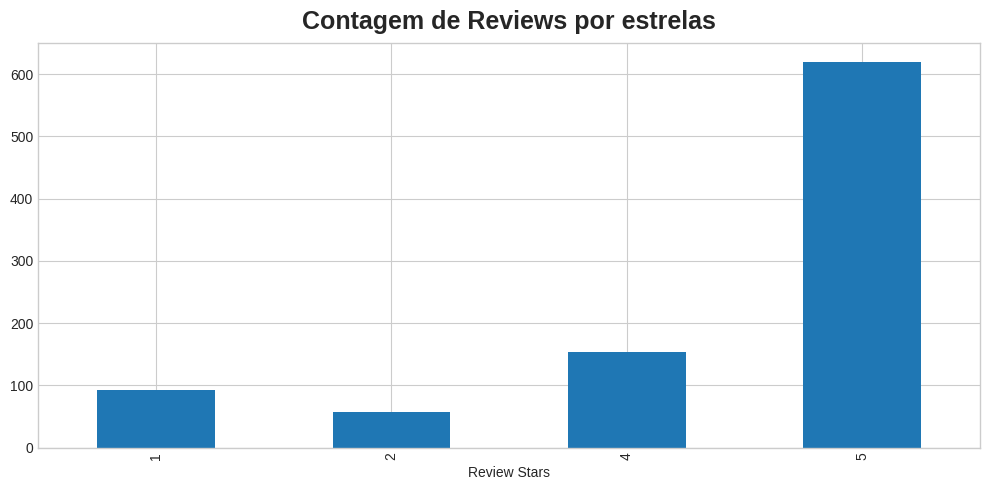

In [1396]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
plt.show()

In [1397]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [1398]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [1399]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 461,
 'like': 389,
 'good': 281,
 'great': 271,
 'taste': 266,
 'one': 262,
 'food': 257,
 'product': 227,
 'flavor': 221,
 'would': 204}

In [1400]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

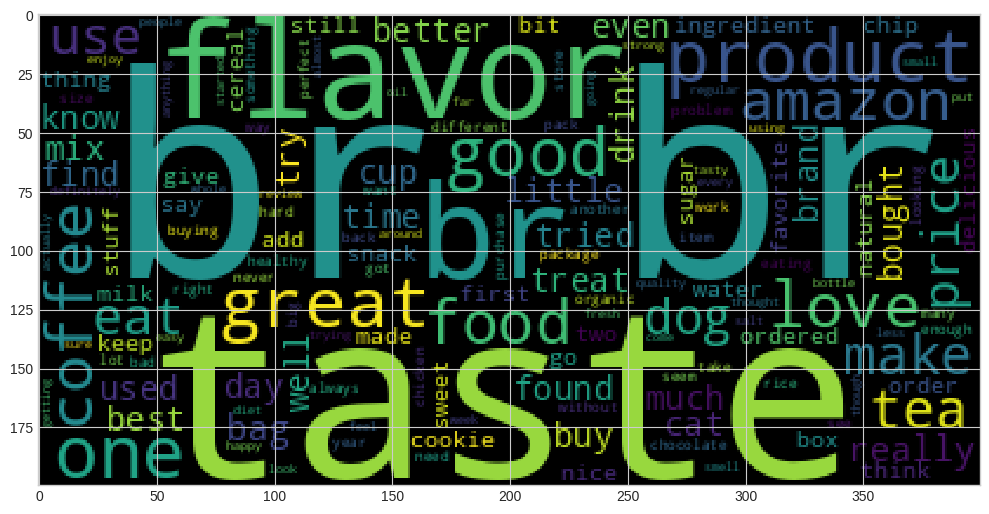

In [1401]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [1402]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 461,
 'like': 389,
 'good': 281,
 'great': 271,
 'taste': 266,
 'one': 262,
 'food': 257,
 'product': 227,
 'flavor': 221,
 'would': 204}

In [1403]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [1404]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

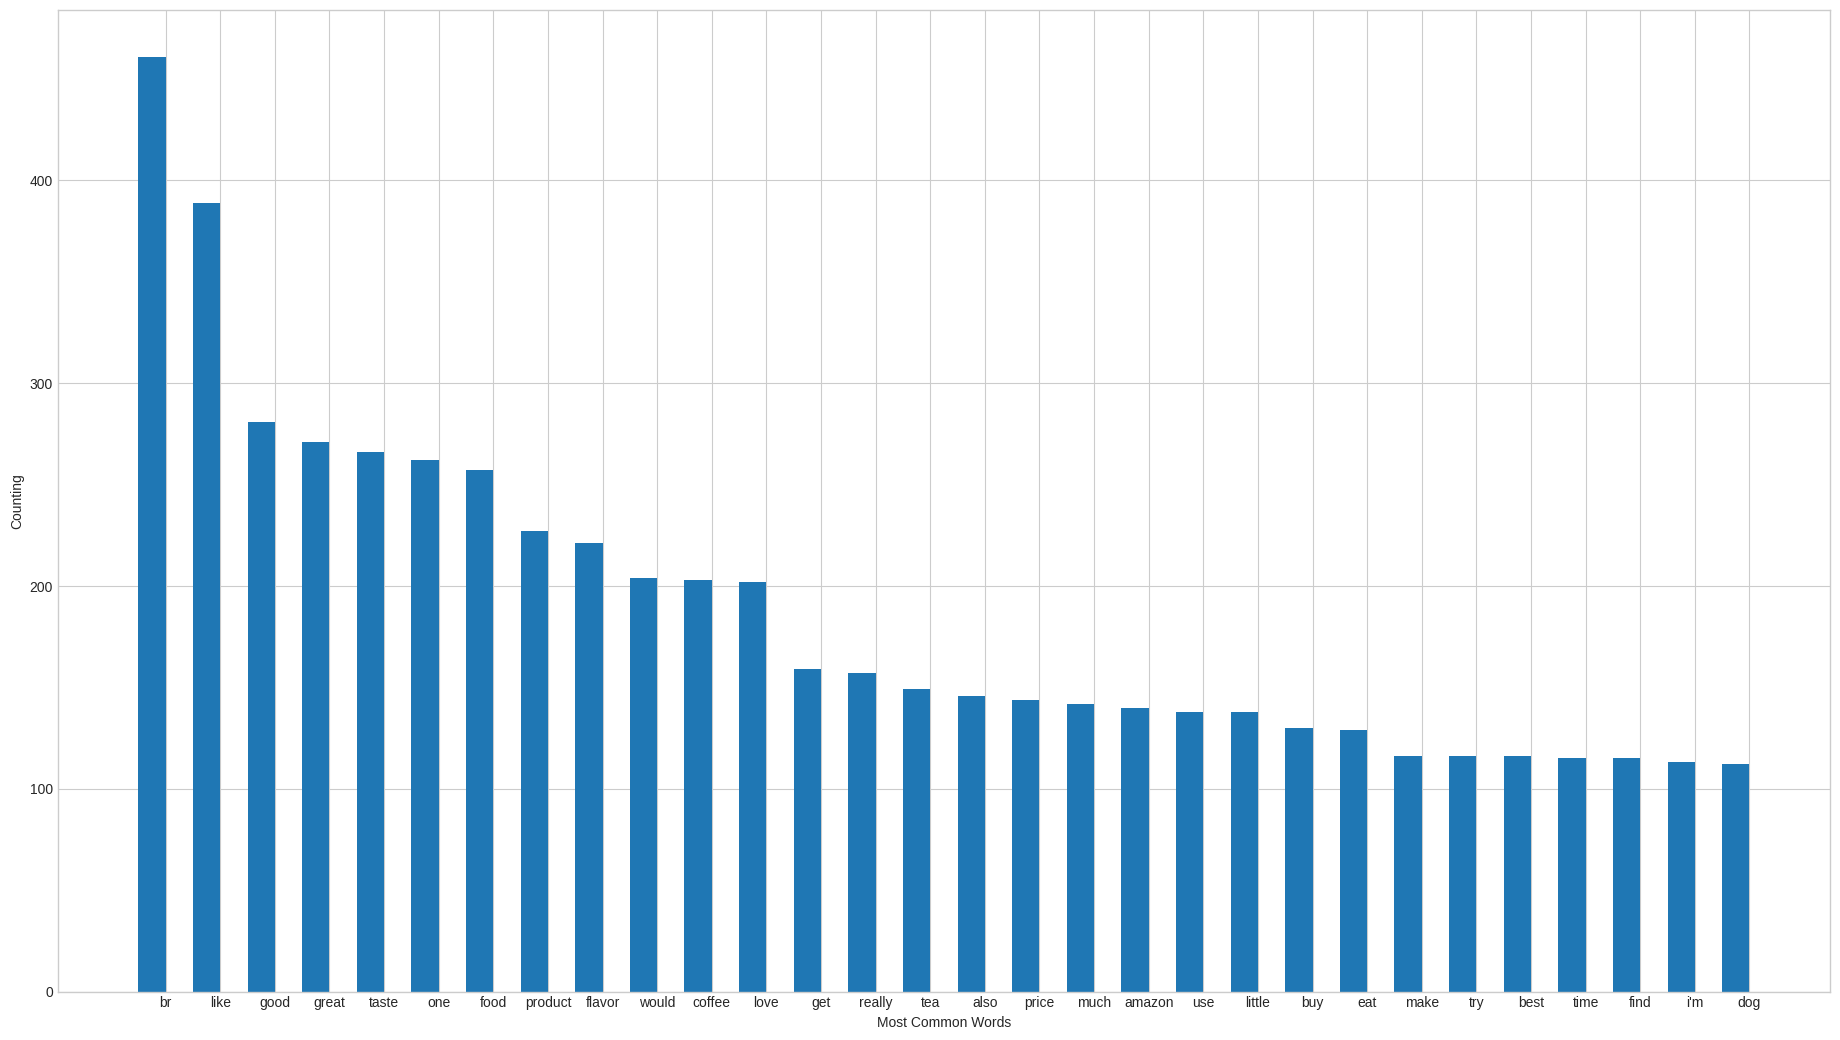

In [1405]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [1406]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [1407]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [1408]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [1409]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1410]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [1411]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [1412]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [1413]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 62299 to 79224
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      923 non-null    int64 
 1   ProductId               923 non-null    object
 2   UserId                  923 non-null    object
 3   ProfileName             923 non-null    object
 4   HelpfulnessNumerator    923 non-null    int64 
 5   HelpfulnessDenominator  923 non-null    int64 
 6   Score                   923 non-null    int64 
 7   Time                    923 non-null    int64 
 8   Summary                 923 non-null    object
 9   Text                    923 non-null    object
 10  negative                923 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 86.5+ KB


In [1414]:
df_reviews['Text']

62299     first cup brew aw nice bergamot scent horribl ...
394680    great product dog love treat hard get eat time...
282998    happi product continu order need eight oclock ...
421220    feed small dog purina one prefer ray nutrish c...
293564           matter long steep tea never bitter delicii
                                ...                        
153696    absolut love erin baker oatmeal raisin granola...
285251    eaten instant noodl year tv commerci entic ent...
311098    stuff yummi great healthi snack interest varia...
267615    easi way eat veggi healthi raw veggi cours goo...
79224     daughter food allergi hard find bar eat great ...
Name: Text, Length: 923, dtype: object

In [1415]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [1416]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

62299     first cup brew aw nice bergamot scent horribl ...
394680    great product dog love treat hard get eat time...
282998    happi product continu order need eight oclock ...
421220    feed small dog purina one prefer ray nutrish c...
293564           matter long steep tea never bitter delicii
                                ...                        
153696    absolut love erin baker oatmeal raisin granola...
285251    eaten instant noodl year tv commerci entic ent...
311098    stuff yummi great healthi snack interest varia...
267615    easi way eat veggi healthi raw veggi cours goo...
79224     daughter food allergi hard find bar eat great ...
Name: Text, Length: 923, dtype: object

In [1417]:
# Set the parameters
max_features = 5000  # Maximum number of words to keep
max_length = 300  # Maximum length of each review
batch_size = 64
epochs = 10

In [1418]:
# Build the model
model_tf = Sequential()
model_tf.add(Embedding(max_features, 128))
model_tf.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_tf.add(Dense(1, activation='sigmoid'))

# Compile the model
model_tf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1419]:
#Salvando modelo 
pickle.dump(model_tf,open('model_tensorflow.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-20 14:24:20         2223
metadata.json                                  2023-05-20 14:24:20           64
variables.h5                                   2023-05-20 14:24:20      3103176


In [1420]:
X = df_reviews['Text']
y = df_reviews['negative']

In [1421]:
X = np.array(df_reviews['Text'])
y = np.array(df_reviews['negative'])

In [1422]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
#word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (1546, 4701)
y.shape =  (1546,)


In [1423]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

In [1424]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1425]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling

### Machine Learning

#### Gaussian Naive Bayes (GaussianNB).

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.96      0.98       625
    Negativo       0.96      1.00      0.98       611

    accuracy                           0.98      1236
   macro avg       0.98      0.98      0.98      1236
weighted avg       0.98      0.98      0.98      1236

ROC Score: 0.9776
Accuracy Score: 0.9773462783171522
Average Precision Score: 0.9561815336463224
f1 Score: 0.9776
Confusion matrix, without normalization
[[597  28]
 [  0 611]]


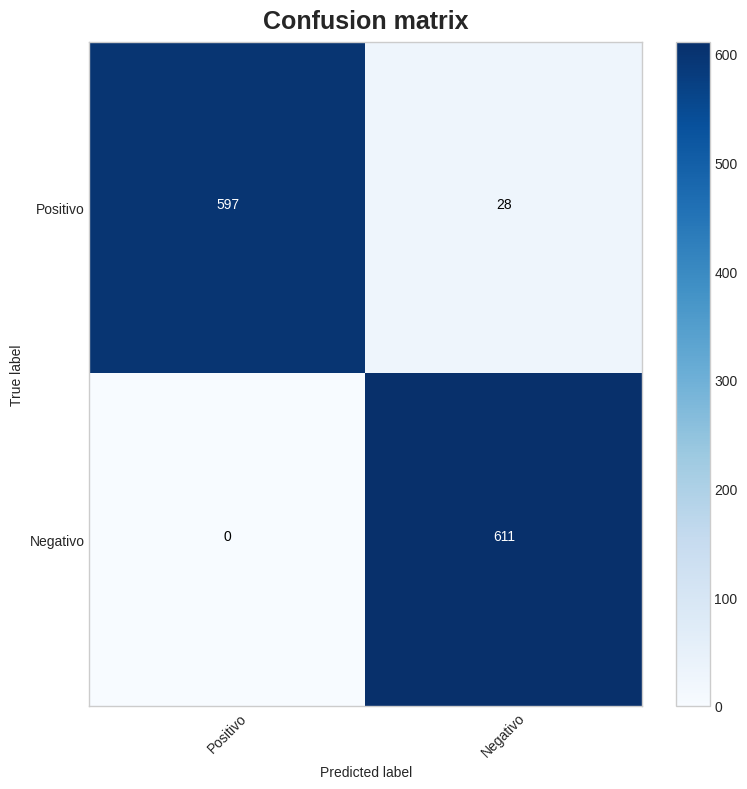

In [1426]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

Classification Report
              precision    recall  f1-score   support

    Positivo       0.94      0.80      0.86       625
    Negativo       0.82      0.95      0.88       611

    accuracy                           0.87      1236
   macro avg       0.88      0.87      0.87      1236
weighted avg       0.88      0.87      0.87      1236

ROC Score: 0.8705950900163667
Accuracy Score: 0.8697411003236246
Average Precision Score: 0.8011782416742587
f1 Score: 0.8777524677296887
Confusion matrix, without normalization
[[497 128]
 [ 33 578]]


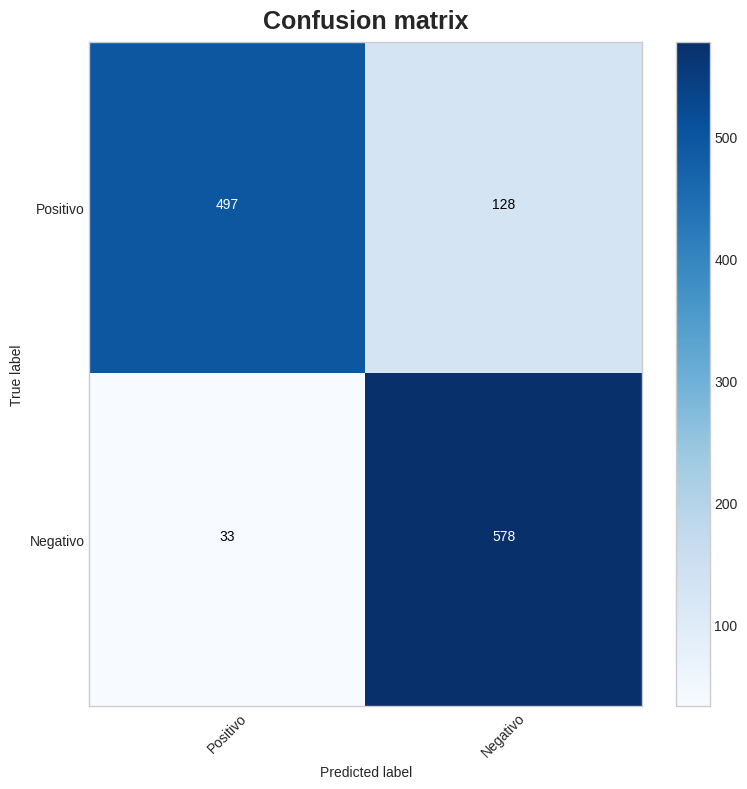

In [1427]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)

roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [1428]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

Classification Report
              precision    recall  f1-score   support

    Positivo       0.92      0.84      0.88       148
    Negativo       0.86      0.93      0.90       162

    accuracy                           0.89       310
   macro avg       0.89      0.88      0.89       310
weighted avg       0.89      0.89      0.89       310

ROC Score: 0.8849683016349684
Accuracy Score: 0.8870967741935484
Average Precision Score: 0.8397519485691529
f1 Score: 0.8961424332344213
Confusion matrix, without normalization
[[124  24]
 [ 11 151]]


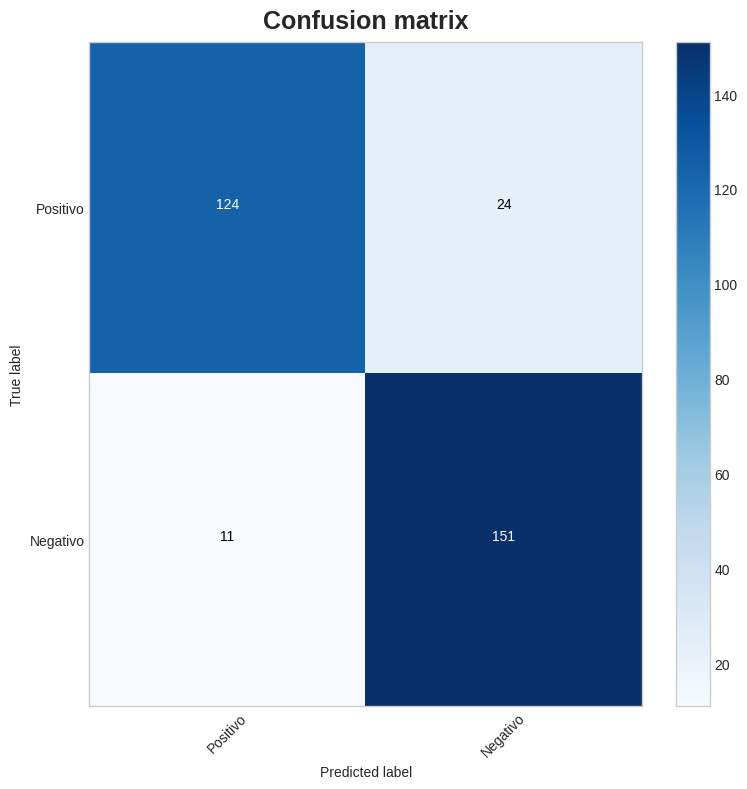

In [1429]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [1430]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [1431]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

In [1432]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10
5/5 [==============================] - 3s 180ms/step - loss: 1.9188 - val_loss: 0.4782
Epoch 2/10
5/5 [==============================] - 1s 144ms/step - loss: 1.4616 - val_loss: 0.4866
Epoch 3/10
5/5 [==============================] - 1s 129ms/step - loss: 1.1935 - val_loss: 0.4901
Epoch 4/10
5/5 [==============================] - 1s 150ms/step - loss: 1.1820 - val_loss: 0.4671
Epoch 5/10
5/5 [==============================] - 1s 174ms/step - loss: 0.9868 - val_loss: 0.4798
Epoch 6/10
5/5 [==============================] - 1s 201ms/step - loss: 0.9478 - val_loss: 0.4812
Epoch 7/10
5/5 [==============================] - 1s 173ms/step - loss: 0.8861 - val_loss: 0.4831
Epoch 8/10
5/5 [==============================] - 1s 226ms/step - loss: 0.8772 - val_loss: 0.4713
Epoch 9/10
5/5 [==============================] - 1s 195ms/step - loss: 0.8125 - val_loss: 0.4867
Epoch 10/10
5/5 [==============================] - 1s 207ms/step - loss: 0.8076 - val_loss: 0.4766


Text(0.5, 1.0, 'The learning curves')

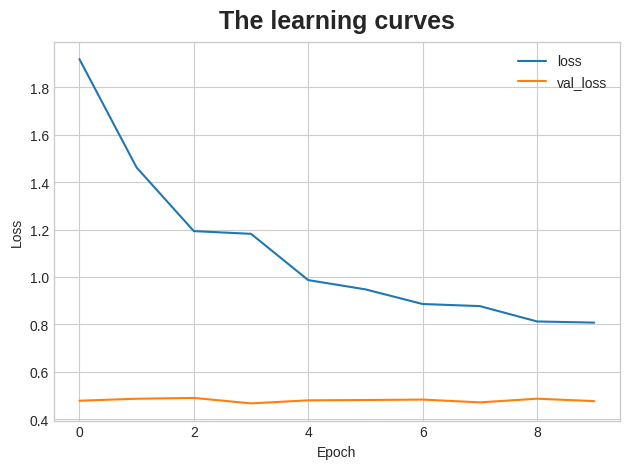

In [1433]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

10/10 [==============================] - 0s 19ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.00      0.00      0.00       148
    Negativo       0.52      1.00      0.69       162

    accuracy                           0.52       310
   macro avg       0.26      0.50      0.34       310
weighted avg       0.27      0.52      0.36       310

ROC Score: 0.5
Accuracy Score: 0.5225806451612903
Average Precision Score: 0.5225806451612903
f1 Score: 0.6864406779661018
Confusion matrix, without normalization
[[  0 148]
 [  0 162]]


/home/andsilva/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andsilva/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andsilva/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


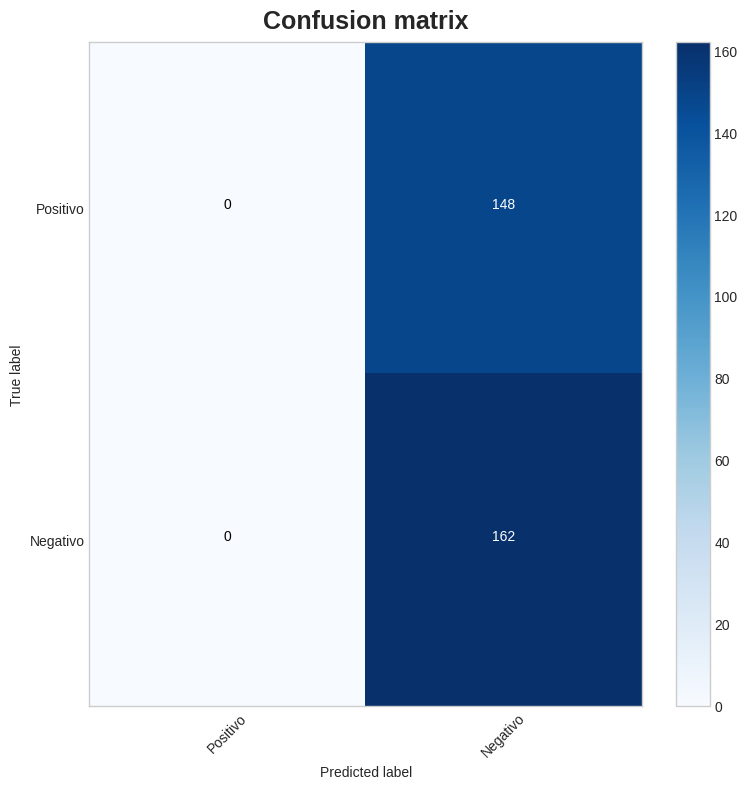

In [1434]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [1435]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [1436]:
clf_gnb_roc = clf_gnb.predict(x_validation)
model_roc = model.predict(x_validation)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

10/10 [==============================] - 0s 12ms/step


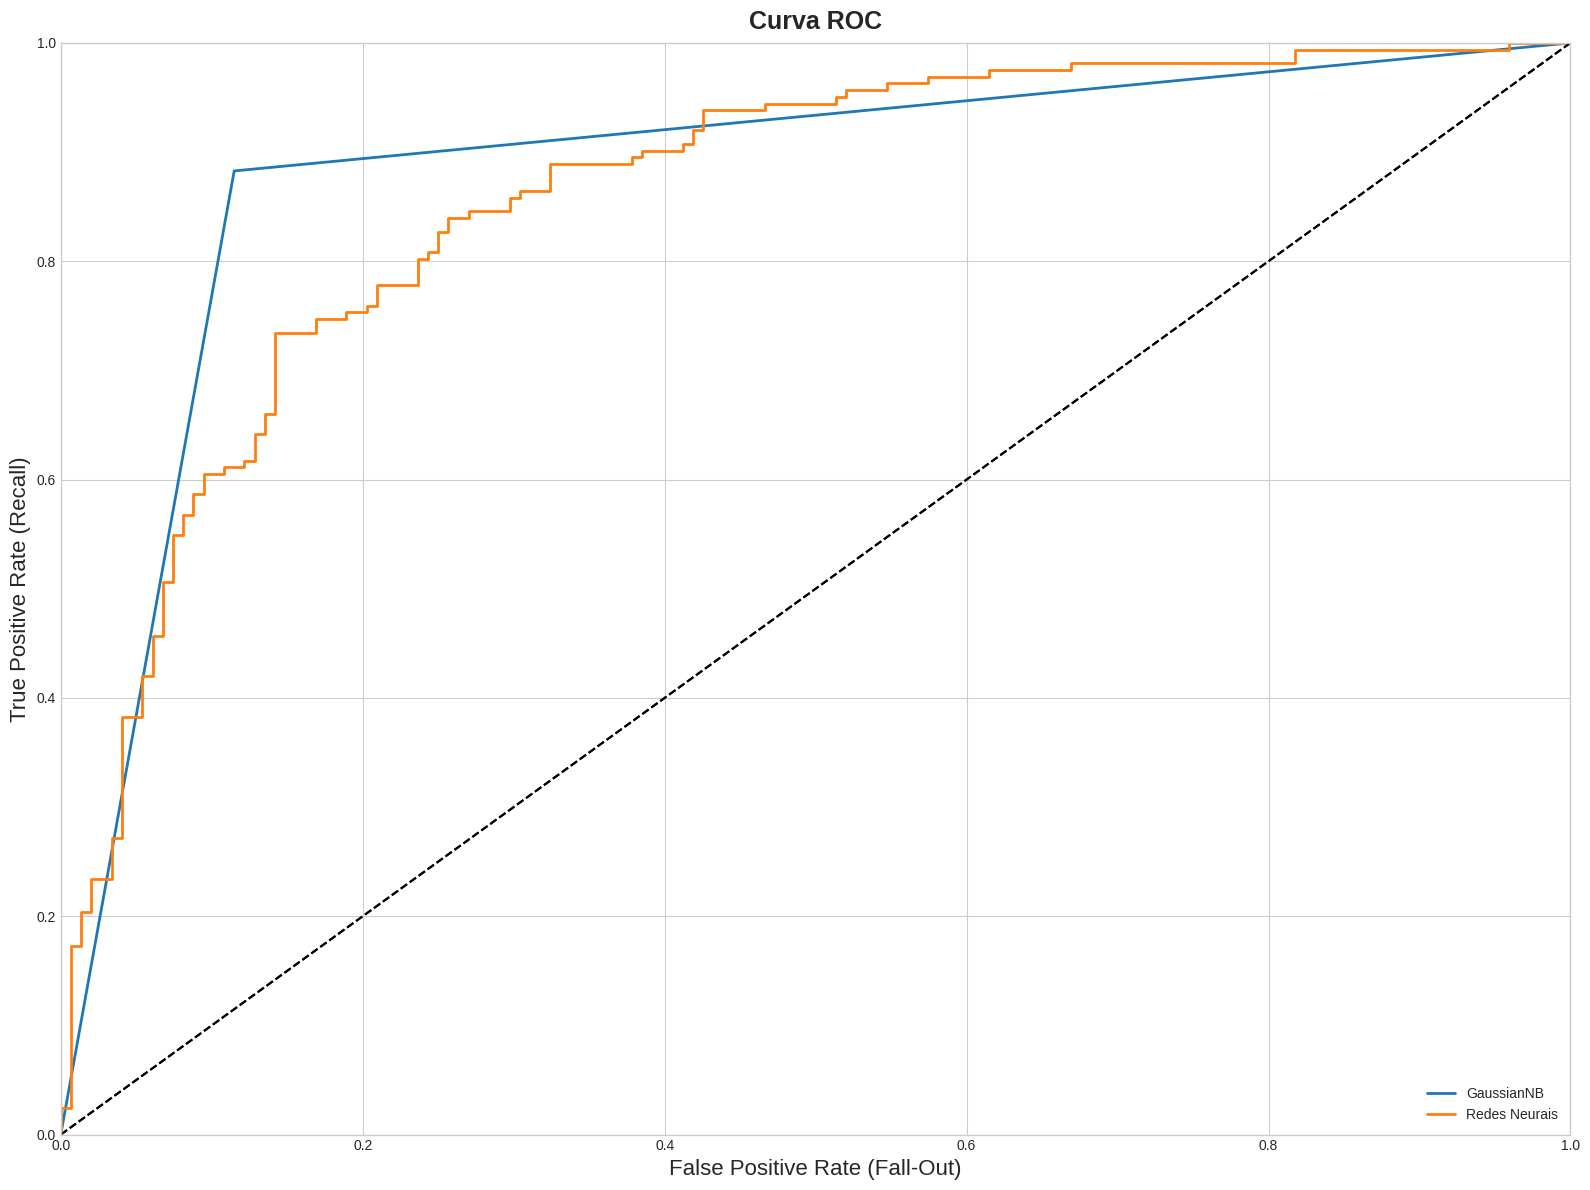

In [1437]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='GaussianNB')
plot_roc_curve(fpr_net, tpr_net_lr, label='Redes Neurais')
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.legend(loc="lower right")
plt.title('Curva ROC', fontweight="bold")
plt.show()

In [1438]:
#### File end HERE

executiontime = round((time.time() - start_time)/60, 2)
print('-----------------------------------------------')
print(f"Execution time: {executiontime} minutes")
print('-----------------------------------------------')

-----------------------------------------------
Execution time: 0.82 minutes
-----------------------------------------------
